In [4]:
import numpy as np
import pandas as pd
import matplotlib as  mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
# 有时候运行代码时会有很多warning输出，像提醒新版本之类的，如果不想这些乱糟糟的输出，可以使用如下代码
warnings.filterwarnings('ignore')
# 用来显示中文标签
mpl.rcParams["font.family"] = "SimHei"
# 用来显示负号
mpl.rcParams["axes.unicode_minus"] = False
df= pd.read_csv("F:\\dl.csv",engine='python')

In [5]:
# 显示前五行
df.head()
# 数据数量
df.shape
# 总体预览
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136426 entries, 0 to 136425
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          136426 non-null  float64
 1   date             135968 non-null  object 
 2   weekday          135968 non-null  object 
 3   month            135968 non-null  float64
 4   time             135968 non-null  object 
 5   hour             135968 non-null  float64
 6   city_num         107759 non-null  object 
 7   login_day        135617 non-null  float64
 8   login_diff_time  135617 non-null  float64
 9   distance_day     135617 non-null  float64
 10  login_time       135617 non-null  float64
 11  province         107347 non-null  object 
 12  cityrank         105875 non-null  object 
dtypes: float64(7), object(6)
memory usage: 13.5+ MB


In [6]:
# 查看空值(发现其中位置信息缺失比较严重，此处将该列删除，同时时间列有一行为空)
df.isnull().sum()
# 检索时间列为空的行
df[df["time"].isnull().values==True]
# 删除地理位置列(两种方式)，主要是因为其缺省较多
# data.drop("user_geohash",axis=1)
data = df.drop(columns=["city_num"])
# 删除行中有空值的
data = data.dropna(axis=0,how='any')
data.head()

,user_id,date,weekday,month,time,hour,login_day,login_diff_time,distance_day,login_time,province,cityrank
0,2.000000e+15,2018/12/23,周日,12.0,11:44,11.0,7.0,6.86,131.0,1.0,广东,一线
1,2.000000e+15,2019/1/11,周五,1.0,9:46,9.0,4.0,1.00,81.0,3.0,江苏,二线
5,2.000000e+15,2019/4/25,周四,4.0,22:32,22.0,4.0,1.25,46.0,68.0,广东,二线
7,2.000000e+15,2019/2/20,周三,2.0,12:35,12.0,4.0,1.50,36.0,38.0,江苏,一线
8,2.000000e+15,2019/1/13,周日,1.0,8:53,8.0,4.0,1.75,368.0,6.0,重庆,一线


In [7]:
#日期转出时间格式,按照时间升序排序
data["date"] = pd.to_datetime(data["date"])
data=data.sort_values(by="date",ascending=True)
data.head()

,user_id,date,weekday,month,time,hour,login_day,login_diff_time,distance_day,login_time,province,cityrank
8506,2.000000e+15,2018-11-16,周五,11.0,9:14,9.0,4.0,1.50,33.0,12.0,河南,五线
9343,2.000000e+15,2018-11-16,周五,11.0,18:37,18.0,6.0,1.17,378.0,1.0,广东,一线
9344,2.000000e+15,2018-11-16,周五,11.0,18:37,18.0,6.0,0.83,66.0,60.0,新疆,五线
9345,2.000000e+15,2018-11-16,周五,11.0,18:40,18.0,7.0,1.00,378.0,23.0,广东,一线
9348,2.000000e+15,2018-11-16,周五,11.0,18:43,18.0,4.0,1.25,66.0,9.0,新疆,三线


In [8]:
# 总体维度下
total_pv = data["login_time"].count()
print("这个时间段内网页的总访量为：{}".format(total_pv))
total_uv = data["user_id"].nunique()
print("这个时间段内独立访客数量为：{}".format(total_uv))

这个时间段内网页的总访量为：105276
这个时间段内独立访客数量为：1


In [9]:
# 总体维度下
total_pv = data["login_time"].sum()
print("这个时间段内网页的总访量为：{}".format(total_pv))
total_uv = data["user_id"].nunique()
print("这个时间段内独立访客数量为：{}".format(total_uv))

这个时间段内网页的总访量为：4045359.0
这个时间段内独立访客数量为：1


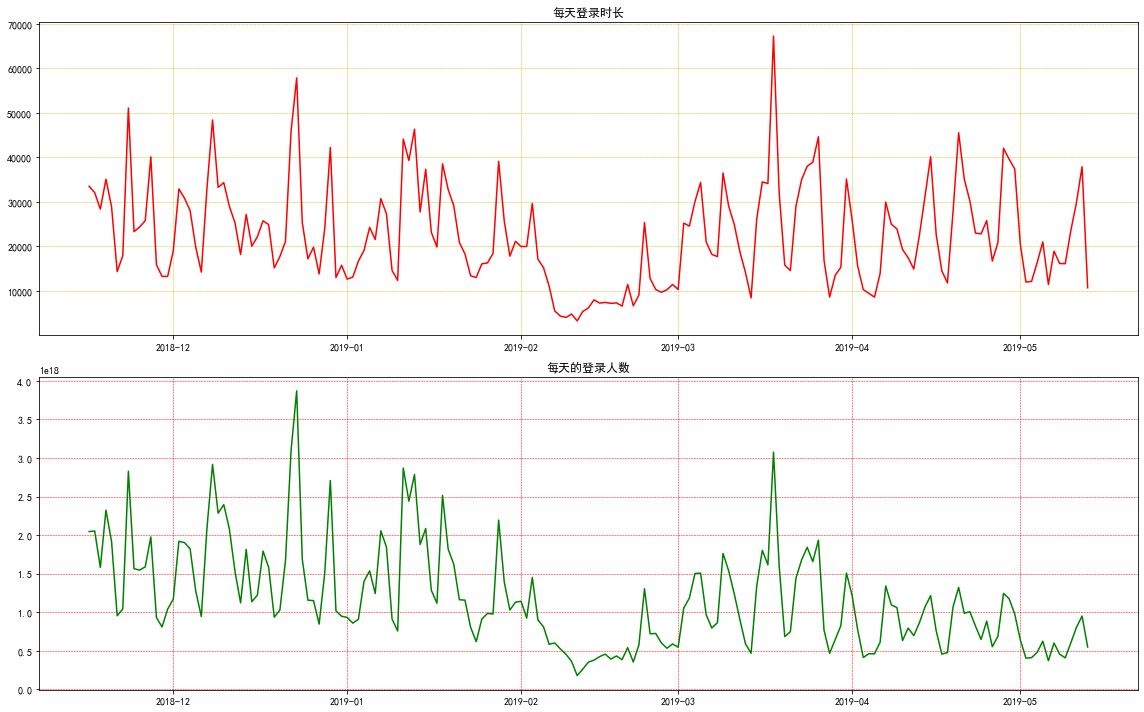

In [12]:
# 日期维度下
# 每日总访问量统计
date_pv = data.groupby("date")["login_time"].sum()
# print(date_pv)
# 每日独立访客数量统计
date_uv = data.groupby("date")["user_id"].apply(lambda x:x.sum())
# print(date_uv)
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(date_pv,c="r")
plt.title("每天登录时长")
plt.grid(color='y', linestyle='--', linewidth=0.5)
plt.subplot(2,1,2)
plt.plot(date_uv,c="g")
plt.title("每天的登录人数")
plt.tight_layout()
plt.grid(color='r', linestyle='--', linewidth=0.5)
plt.show()

hour
0    37272.0
1    15117.0
2     9364.0
3     9930.0
4    11381.0
Name: login_time, dtype: float64
hour
0    1
1    1
2    1
3    1
4    1
Name: user_id, dtype: int64
      hour_pv  hour_uv
hour                  
0     37272.0        1
1     15117.0        1
2      9364.0        1
3      9930.0        1
4     11381.0        1


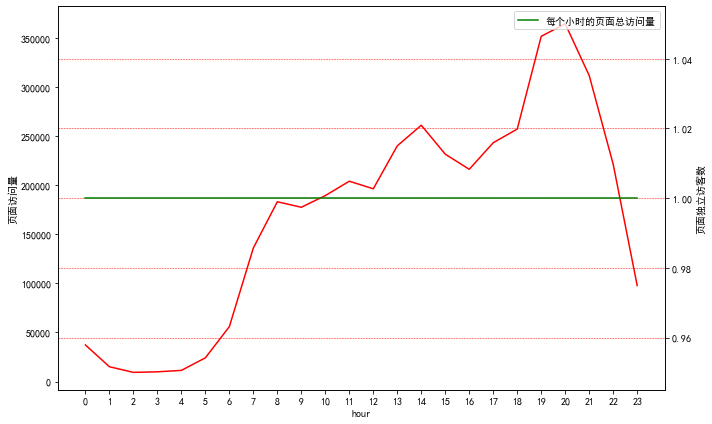

In [13]:

data["hour"] = data["hour"].astype(int)
# 时间维度下的统计情况（主要看访问时间的情况）
# 每日总访问量统计
hour_pv = data.groupby("hour")["login_time"].sum()
print(hour_pv.head())
# 每日独立访客数量统计
hour_uv = data.groupby("hour")["user_id"].apply(lambda x:x.nunique())
print(hour_uv.head())
pv_uv_hour = pd.concat([hour_pv,hour_uv],axis=1)
pv_uv_hour.columns = ["hour_pv","hour_uv"]
print(pv_uv_hour.head())
plt.figure(figsize=(10,6))
pv_uv_hour["hour_pv"].plot(c="r",label="每个小时的页面总访问量")
plt.ylabel("页面访问量")
pv_uv_hour["hour_uv"].plot(c="g",label="每个小时的页面总访问量",secondary_y=True)
plt.ylabel("页面独立访客数")
plt.xticks(range(0,24),pv_uv_hour.index)
plt.legend(loc="best")
plt.grid(color='r', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

hour
0    37272.0
1    15117.0
2     9364.0
3     9930.0
4    11381.0
Name: login_time, dtype: float64
hour
0    1.830000e+18
1    7.200000e+17
2    4.400000e+17
3    4.200000e+17
4    4.960000e+17
Name: user_id, dtype: float64
      hour_pv       hour_uv
hour                       
0     37272.0  1.830000e+18
1     15117.0  7.200000e+17
2      9364.0  4.400000e+17
3      9930.0  4.200000e+17
4     11381.0  4.960000e+17


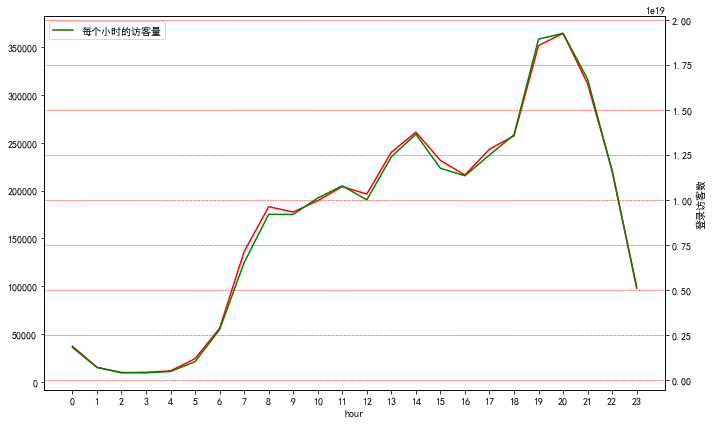

In [14]:

data["hour"] = data["hour"].astype(int)
# 时间维度下的统计情况（主要看访问时间的情况）
# 每日总访问量统计
hour_pv = data.groupby("hour")["login_time"].sum()
print(hour_pv.head())
# 每日独立访客数量统计
hour_uv = data.groupby("hour")["user_id"].apply(lambda x:x.sum())
print(hour_uv.head())
pv_uv_hour = pd.concat([hour_pv,hour_uv],axis=1)
pv_uv_hour.columns = ["hour_pv","hour_uv"]
print(pv_uv_hour.head())
plt.figure(figsize=(10,6))
pv_uv_hour["hour_pv"].plot(c="r",label="每个小时的登录量")
plt.xlabel("登录时长总量")
pv_uv_hour["hour_uv"].plot(c="g",label="每个小时的访客量",secondary_y=True)
plt.ylabel("登录访客数")
plt.xticks(range(0,24),pv_uv_hour.index)
plt.legend(loc="best")
plt.grid(color='r', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

hour
0    37272.0
1    15117.0
2     9364.0
3     9930.0
4    11381.0
Name: login_time, dtype: float64
hour
0    1.830000e+18
1    7.200000e+17
2    4.400000e+17
3    4.200000e+17
4    4.960000e+17
Name: user_id, dtype: float64
      hour_pv       hour_uv
hour                       
0     37272.0  1.830000e+18
1     15117.0  7.200000e+17
2      9364.0  4.400000e+17
3      9930.0  4.200000e+17
4     11381.0  4.960000e+17


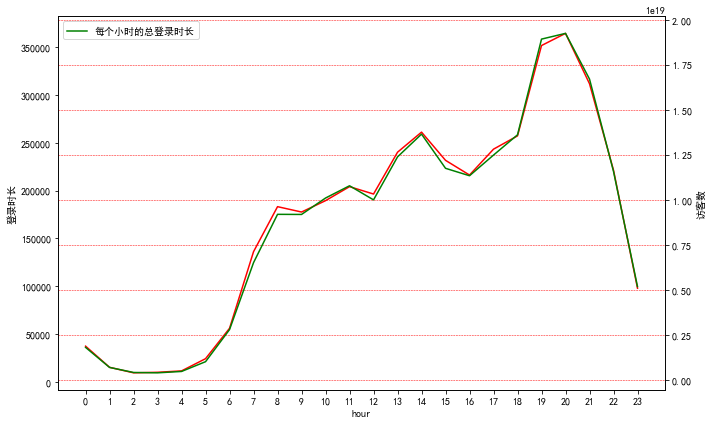

In [15]:
# 时间维度下的统计情况（主要看访问时间的情况）
# 每日总访问量统计
hour_pv = data.groupby("hour")["login_time"].sum()
print(hour_pv.head())
# 每日独立访客数量统计
hour_uv = data.groupby("hour")["user_id"].apply(lambda x:x.sum())
print(hour_uv.head())
pv_uv_hour = pd.concat([hour_pv,hour_uv],axis=1)
pv_uv_hour.columns = ["hour_pv","hour_uv"]
print(pv_uv_hour.head())
plt.figure(figsize=(10,6))

pv_uv_hour["hour_pv"].plot(c="r",label="每个小时的页面总访问量")
plt.ylabel("登录时长")
pv_uv_hour["hour_uv"].plot(c="g",label="每个小时的总登录时长",secondary_y=True)
plt.ylabel("访客数")
plt.xticks(range(0,24),pv_uv_hour.index)
plt.legend(loc="best")
plt.grid(color='r', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()